# Project: TMDb Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will explore and analyze over 10.000 movie titles from the TMDd Movies database. 

The dataset contains the following information of each movie:
   - **id** : movie id
   - **imdb_id** : id given by imdb
   - **popularity** : importat metric for TMDb, that considers number of votes, views, favourite, watchlist for the day among others such as release date, score and total votes.
   - **budget** : budget in US dollars
   - **revenue** : incomes in US dollars
   - **original_title** : movie title
   - **cast** : actors in the movie
   - **homepage** : movie's website
   - **director** : name of the movie's director
   - **tagline** : slogan of the movie
   - **keywords** : words related to the movie
   - **overview** : brief description of the movie
   - **runtime** : how long is the movie in minutes
   - **genres** : genre classification for the movie 
   - **production_companies** : companies that made the movie
   - **release_date** : the date the movie was released
   - **vote_count** : amount of people that voted
   - **vote_average** : average score from 1 to 10 of the movie
   - **release_year** : the year the movie was released
   - **budget_adj** : the budget adjusted to 2010 by inflation
   - **revenue_adj** : the revenue adjusted to 2010 by inflation

The report will address several questions regarding information about popularity, people votes, runtime, genre, director and cast of more than 10.000 movie titles between 1960 and 2015. Some of the questions we will be answering are:
- Which genres are more popular through the years?
- Which director is more popular and which one has better rating?
- Which actor has been in more movies and has better rating?
- Do shorter movies get better ratings?
- Are newer movies shorter?
- Do newer movies get better ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section, data will be loaded into a dataframe and it will be checked how clean and organized it is.

### General Properties

In [2]:
# Load data and visualize first rows
df = pd.read_csv('tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# Check which columns are in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Check for some main statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In this section, data will be cleaned in order to only work with columns that will be useful for the analysis.

In [5]:
# check if there are any duplicated rows
sum(df.duplicated())

1

In [6]:
# eliminate duplicate row
df.drop_duplicates(inplace=True)

In [7]:
# Delete columns that won't be used for the analysis
df.drop(['homepage', 'imdb_id', 'tagline', 'overview', 'keywords', 'budget', 'revenue', 'release_date','production_companies'], axis=1, inplace=True)

In [8]:
# check the new dataframe
df.head()

,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# check for missing values in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [10]:
# Cast, Director and Genres have some missing values and because they are not so many in proportion to the total size of the datafram, they will be removed
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
id                10731 non-null int64
popularity        10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [11]:
# Check if there is anything weird in the main statistics
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Findings:**
- Runtime range is from 0 min to 900 min, so we will check the movies with no minutes
- Vote average range is from 1.5 to 9.2 with a mean of 6
- Most of the movies where released after 1995 and 50% if them after 2006, so during the last 9 years of this dataset the number of movies released was the same as 46 years ago (1960-2006)
- There is no budget and revenue information for 50% of the movies

In [12]:
# check for movies with 0 minutes of runtime
df.query('runtime == 0')

,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,80,6.5,2015,0.000000e+00,0.0
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,15,5.6,2015,0.000000e+00,0.0
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,11,5.4,2015,0.000000e+00,0.0
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,11,4.6,2015,0.000000e+00,0.0
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,20,6.6,2015,0.000000e+00,0.0
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,14,6.0,2014,0.000000e+00,0.0
1849,18247,0.120350,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,13,5.2,2009,0.000000e+00,0.0


In [13]:
# delete those rows because this information will not be necessary
df.drop(df[df['runtime'] == 0].index, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 12 columns):
id                10703 non-null int64
popularity        10703 non-null float64
original_title    10703 non-null object
cast              10703 non-null object
director          10703 non-null object
runtime           10703 non-null int64
genres            10703 non-null object
vote_count        10703 non-null int64
vote_average      10703 non-null float64
release_year      10703 non-null int64
budget_adj        10703 non-null float64
revenue_adj       10703 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [14]:
# Now let's group the release year by decade
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010']
df['decades'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010


In [15]:
# Different dataframes will be created for genres, cast and director in order to split the information in them
df_genres = df.copy()

split = df_genres['genres'].str.split('|').apply(pd.Series).stack().reset_index(level=1, drop=True)
split.name = 'genres'
df_genres = df_genres.drop(['genres'], axis=1).join(split)
df_genres.head()

,id,popularity,original_title,cast,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Action
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Adventure
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Science Fiction
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Thriller
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,Action


In [16]:
df_cast = df.copy()

split_cast = df['cast'].str.split('|').apply(pd.Series).stack().reset_index(level=1, drop=True)
split_cast.name = 'cast'
df_cast = df_cast.drop(['cast'], axis=1).join(split_cast)
df_cast.head()

,id,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,cast
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Chris Pratt
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Bryce Dallas Howard
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Irrfan Khan
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Vincent D'Onofrio
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Nick Robinson


In [17]:
df_director = df.copy()

split_director = df['director'].str.split('|').apply(pd.Series).stack().reset_index(level=1, drop=True)
split_director.name = 'director'
df_director = df_director.drop(['director'], axis=1).join(split_director)
df_director.head()

,id,popularity,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,director
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010,Colin Trevorrow
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010,George Miller
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010,Robert Schwentke
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010,J.J. Abrams
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010,James Wan


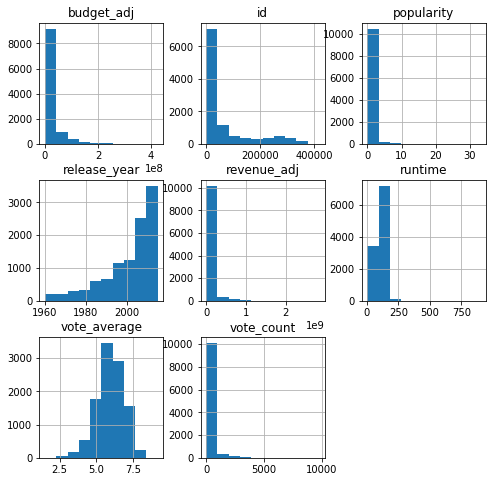

In [18]:
df.hist(figsize=(8,8));

In [19]:
# Create a function for each df

def plot_genre(x,y,graf):
    df_genres.groupby(x)[y].mean().sort_values(ascending=False).plot(kind=graf, figsize=(10,5))
    plt.title('{} of Movies by {} (1960-2015)'.format(y.title(),x.title()))
    plt.xlabel(x.title())
    plt.ylabel(y.title());

def plot(x,y,graf):
    df.groupby(x)[y].mean().sort_values(ascending=False).plot(kind=graf, figsize=(10,5))
    plt.title('{} of Movies by {} (1960-2015)'.format(y.title(),x.title()))
    plt.xlabel(x.title())
    plt.ylabel(y.title());
    

<a id='eda'></a>
## Exploratory Data Analysis

Now that data has been organized and cleaned, some questions will be answered through exploration and plots.


### Which genres are more popular and have better vote average?

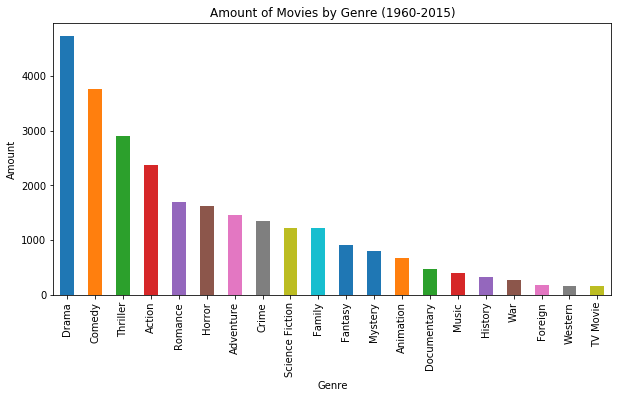

In [20]:
df_genres.groupby('genres')['id'].count().sort_values(ascending=False).plot(kind= 'bar', figsize=(10,5));
plt.title('Amount of Movies by Genre (1960-2015)')
plt.xlabel('Genre')
plt.ylabel('Amount');

This bar plot shows that most of the movies produced between 1960 and 2015 were Drama, almost 50% of them. This genre is followed by Comedy, Thriller and Action.

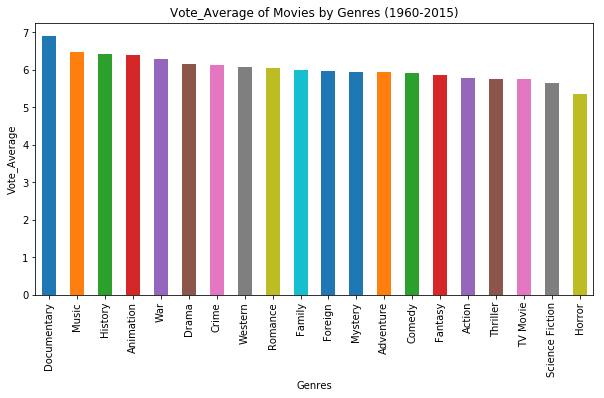

In [63]:
plot_genre('genres','vote_average','bar')

Although Drama was the most produced, the genre that get the better vote average by people is Documentary, followed by Music, History and Animation.

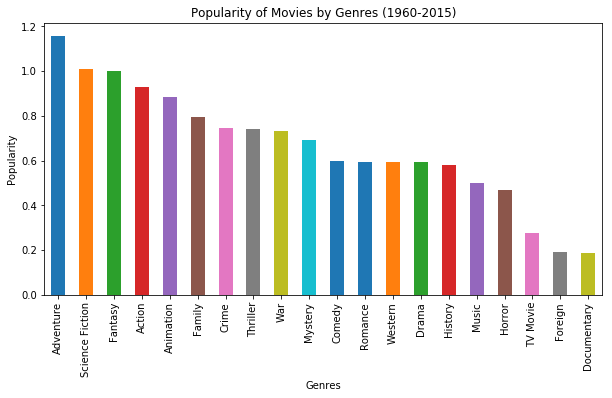

In [64]:
plot_genre('genres','popularity','bar')

The movie genre that has the best popularity rating is Advenure, followed by Science Fiction, Fantasy and Action.

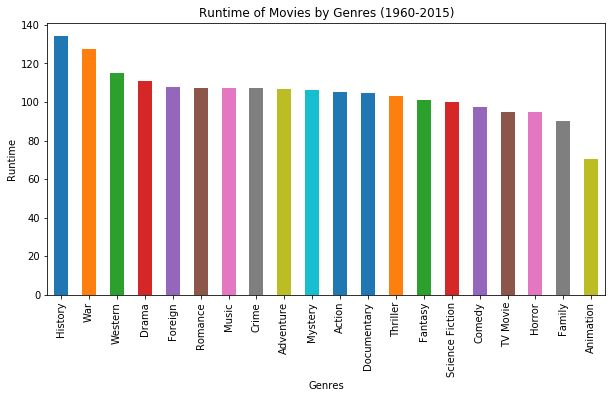

In [65]:
plot_genre('genres','runtime','bar')

The longest movies are History, War and Western genres.

### Which Director is more popular and which one has better rating of the movies he directed?

In [70]:
df_director.groupby('director')['id'].count().sort_values(ascending=False).head(10)

director
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      30
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
David Cronenberg     19
Name: id, dtype: int64

In [71]:
df_director.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)

director
Mark Cousins              9.2
David Mallet              8.7
Curt Morgan               8.5
Saul Swimmer              8.5
Michael Henry Wilson      8.5
Anthony Mandler           8.4
Jorge RamÃ­rez SuÃ¡rez    8.4
David Dawkins             8.4
Chris Hegedus             8.4
Claude Lanzmann           8.3
Name: vote_average, dtype: float64

In [72]:
df_director.groupby('director')['popularity'].mean().sort_values(ascending=False).head(10)

director
Colin Trevorrow       16.696886
David Leitch          11.422751
Chad Stahelski        11.422751
Juno John Lee          8.411577
Alan Taylor            6.883129
Peter Richardson       6.668990
Christopher Nolan      6.195521
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Name: popularity, dtype: float64

### Which actor has participated in more movies and with better average rating and popularity?

In [69]:
df_cast.groupby('cast')['id'].count().sort_values(ascending=False).head(10)

cast
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
Name: id, dtype: int64

In [73]:
df_cast.groupby('cast')['vote_average'].mean().sort_values(ascending=False).head(10)

cast
Cari Beauchamp        9.2
Mark Cousins          9.2
Jean-Michel Frodon    9.2
Agnes de Mille        9.2
Oona Chaplin          8.8
Sam Brown             8.7
Jon Carin             8.7
John Deacon           8.5
Travis Rice           8.5
Jake Blauvelt         8.5
Name: vote_average, dtype: float64

In [74]:
df_cast.groupby('cast')['popularity'].mean().sort_values(ascending=False).head(10)

cast
Josh Helman         28.419936
Daisy Ridley        11.173104
Hugh Keays-Byrne    10.211471
Daniel Henney        8.691294
Ryan Potter          8.691294
Brian Dobson         8.411577
Gloria Foster        7.753899
Ansel Elgort         7.703183
Blake Cooper         7.137273
Ki Hong Lee          7.137273
Name: popularity, dtype: float64

### Do shorter or longer movies get better ratings?

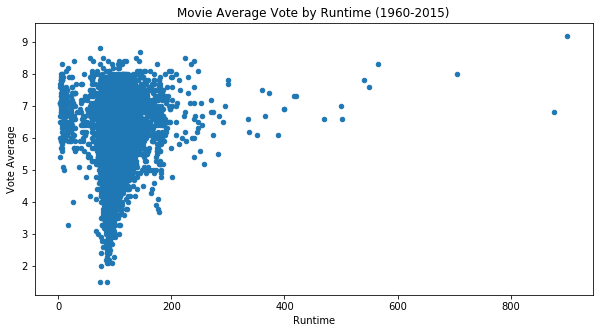

In [75]:
df.plot(x='runtime', y='vote_average', kind='scatter', figsize=(10,5))
plt.title('Movie Average Vote by Runtime (1960-2015)')
plt.xlabel('Runtime')
plt.ylabel('Vote Average');

Most of the movies runtime is between 0 and 200 minutes, but the ones longer have a vote average greater than 5 points, which is very remarkable.

In [76]:
median_vote = df['vote_average'].median()
low_vote = df.query('vote_average < {}'.format(median_vote))
high_vote = df.query('vote_average >= {}'.format(median_vote))

mean_runtime_low = low_vote['runtime'].mean()
mean_runtime_high = high_vote['runtime'].mean()

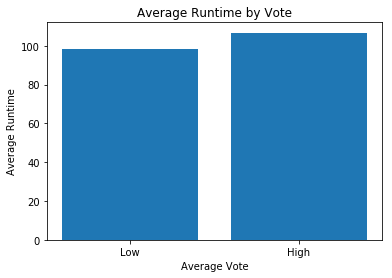

In [77]:
locations = [1, 2]
heights = [mean_runtime_low, mean_runtime_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Runtime by Vote')
plt.xlabel('Average Vote')
plt.ylabel('Average Runtime');

This plot shows that movies with highest vote average seem to be longer than the ones with lower vote rating.

### Are newer movies shorter?

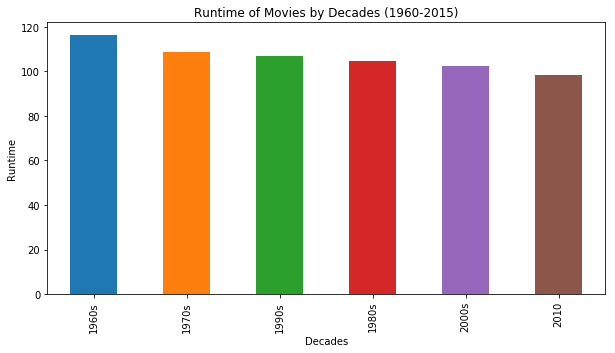

In [78]:
plot_genre('decades','runtime','bar')

It can be seen that in the 1960's movie's runtime was around 120 minutes and in the 2010's is near 100 minutes, so it can be said that the runtime ha decreased 16.6%

### Do newer movies get better ratings?

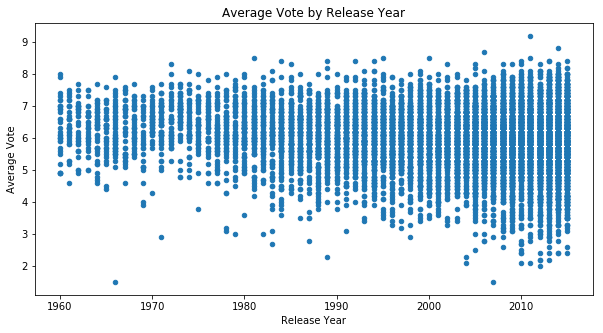

In [79]:
df.plot(x='release_year', y='vote_average', kind='scatter',figsize=(10,5))
plt.title('Average Vote by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Vote');

It doesn't seem to be a strong trend in this plot wether newer movies have better or worst vote rating, because it has slightly decreased. It is clear that through the decades, the amount of movies released has increased.

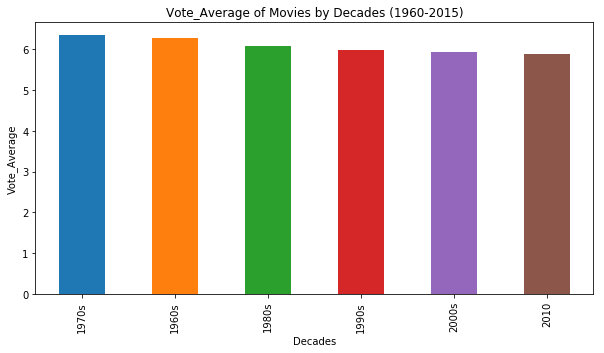

In [80]:
plot('decades','vote_average','bar')

As shown in the scatter map previously, the trend of the average vote of the movies through the years is slightly less.

<a id='conclusions'></a>
## Conclusions

Thanks to the exploratory analysis in the previous module, it can be concluded:

**Genres**
- Drama, Comedy and Thriller are the movie genre mostly done from 1960 to 2015
- Documentary, Music and History genres are the ones better rated by the users
- Adventure, Science Fiction and Fantasy are the most popular genres

**Director**
- Woddy Allen has made the most amount of movies during 1960 to 2015, with 46 titles
- Mark Cousins has the best vote average movie with 9.2
- Colin Trevorrow has the most popular movie average with 16,7

**Cast**
- Robert De Niro has been part of 72 movies, been the actor with most movies
- Cari Beauchamp has participated in the better rated movies
- JOsh Helman has acted in the most popular movies

**Runtime**
- Movies with a runtime over 100 minutes have better vote rating than shorter ones
- Runtime has decreased from 1960 to 2015

**Average Vote**
- The average vote rating has decreased from 1970 to 2015

### Limitations

The data set was pretty consistent because it had a lot of movie titles in order to generate some good conclusions.

The process that took me a long time to deal with was the way to analyze the columns Cast, Director and Genre, because I couldn't use the function explode as it is only available for pandas newer version, so I had to search for other solutions in order to do the same.

Another aspect that I think it could have been really useful to analyze is the revenue, bugdet and profitability of the movies and maybe see if there was any correlationship with the cast, director, genre, etc. I didn't make this analysis because I observed that over 50% of the movies had this information as $0, which is not possible in this industry.



## Submitting your Project 


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0